# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

para está análise usaremos os dados disponível no link acima 


## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np #funções matemáticas 
import seaborn as sns #gerações de gráficos 
import matplotlib.pyplot as plt #gerações de gráficos 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans #algoritimo para segmentação do mercado 
from sklearn.decomposition import PCA  # utilizado para redução de dimensionalidade 

Para facilitar a leitura dos dados  fiz o upload do aarquivo csv para o guithub, vamos carregar os dados atráves do comando abaixo.

In [2]:
url = "https://raw.githubusercontent.com/JosefersonBarreto/analise_de_clusters_Departamento_de_marketing/main/Marketing_data.csv"



creditcard_df = pd.read_csv(url)


In [3]:
creditcard_df.shape

(8950, 18)

nos temos 8950,cada linha indica um cliente do banco e temos 18 caractéristicas de cada cliente,vamos observar os primeiros 10 registros

In [4]:
creditcard_df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


aqui podemos ver as nossa variáveis discritas anteriormente 


**CUST_ID** : Identificação do Titular do Cartão de Crédito (Categórico)

**BALANCE**: Saldo que resta na conta para fazer compras 

**BALANCE_FREQUENCY** : Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
COMPRAS : Quantidade de compras feitas na conta

**ONEOFF_PURCHASES** : Valor máximo de compra feito de uma só vez

**INSTALLMENTS_PURCHASES** : Valor de compra feito em parcela

**CASH_ADVANCE** : Dinheiro adiantado fornecido pelo usuário

**PURCHASES_FREQUENCY** : Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = comprado com frequência, 0 = não comprado com frequência)

**ONEOFFPURCHASESFREQUENCY**: Com que frequência as compras estão acontecendo de uma só vez (1 = compradas com frequência, 0 = não compradas com frequência)

**PURCHASESINSTALLMENTSFREQUENCY** : com que frequência as compras parceladas estão sendo feitas (1 = feitas com frequência, 0 = não feitas com frequência)

**CASHADVANCEFREQUENCY** : com que frequência as dinheiro adiantado sendo pago

**CASHADVANCETRX** : Número de transações feitas com "Cash in Advanced"

**PURCHASES_TRX** : Número de transações de compra feitas

**CREDIT_LIMIT** : Limite de cartão de crédito para o usuário

**PAYMENTS** : Valor do pagamento feito pelo usuário

**MINIMUM_PAYMENTS** : Valor mínimo dos pagamentos feitos pelo usuário

**PRCFULLPAYMENT**: Porcentagem do pagamento integral pago pelo usuário

**POSSIBILIDADE** : Posse do serviço de cartão de crédito para o usuário


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

podemos perceber que  temos dados faltantes em nosso conjunto de dados 

# Fazendo a Descrição dos Nossos Dados 

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


aqui temos algumas informações importantes,como média,desvio padrão,mediana,entre outras informações, por exemplo,  a média de saldo na conta corrente(**BALANCE**) é de 1564 apróximadamente, já o cliente que apresenta o menor valor na conta correte é de 0 e valor mmáximo é de 19.043 doláres ,além disso temos o valor médio das compras(**PURCHES**) que é de 1003 dólares apróximadamente,entre outras informações que podiamos extrair. 

In [7]:
#creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000] função de filtragem 

vendo o cliente que diantou o maior número de crédito 

In [8]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## <font  color=white face=arial black size=9 > Visualização e exploração dos dados </font>

Vamos utilizar o heatmap para verificar se temos registros nulos 

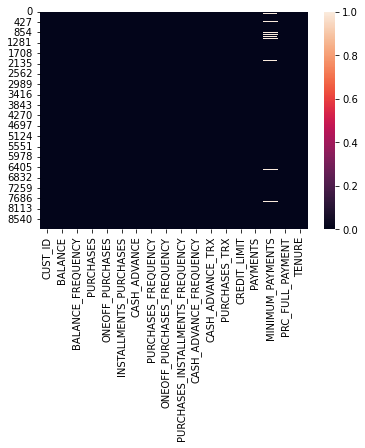

In [9]:
sns.heatmap(creditcard_df.isnull());

podemos perceber que  pelo hitmap a variável **MINIMUM_PAYMENTS** tem valores nulos , além dissso, pela função **info** a variável CREDIT_LIMIT  também apresentou valores ausentes , outra forma de vermos isso é atráves do código abaixo.

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Vamos fazer a imputação dos valores ausentes, para isso iremos substituir os valores aausentes pelo valor mediano da coluna em questão, devido ao fato que a média ser muito sensível a valores extremos,por isso optamos por utilizar a mediana nesse caso 

In [11]:
import statistics as sta
#creditcard_df['MINIMUM_PAYMENTS'].sta.median(creditcard_df['MINIMUM_PAYMENTS'])
sta.median(creditcard_df['MINIMUM_PAYMENTS'])

165.2319525

In [12]:
#creditcard_df['MINIMUM_PAYMENTS'].median()

substituindo os valores ausentes na variável **MINIMUM_PAYMENTS** pela mediana 




In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = sta.median(creditcard_df['MINIMUM_PAYMENTS'])

Fazendo o mesmo procedimento para variável **CREDIT_LIMIT**





In [14]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = sta.median(creditcard_df['CREDIT_LIMIT'])

Vamos verificar se ainda temos valores nulos presentes em nosso conjunto de dados

In [15]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

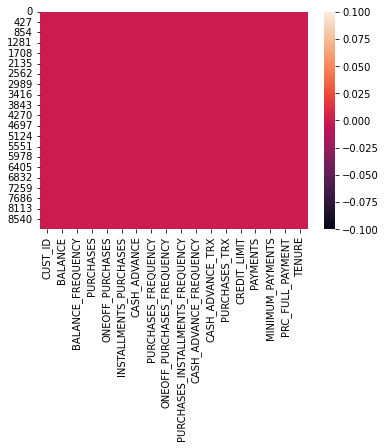

In [16]:
sns.heatmap(creditcard_df.isnull());

Como podemos ver,não temos mais a presença de valores ausentes em nosso dataset,podemos prosseguir para próxima etapa.

## Verificando se temos colunas duplicadas 

In [17]:
creditcard_df.duplicated().sum()

0

como a coluna **CUT_ID** é apenas pra identificação dos clientes,vamos remover está coluna, pois não será importante para o modelo 

In [18]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [19]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,165.231953,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [21]:
len(creditcard_df.columns)


17

Ficamos com 17 colunas ,como nossas variaveis são do tipo númericas,vamos mostrar os gráficos das distribuição dos dados 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

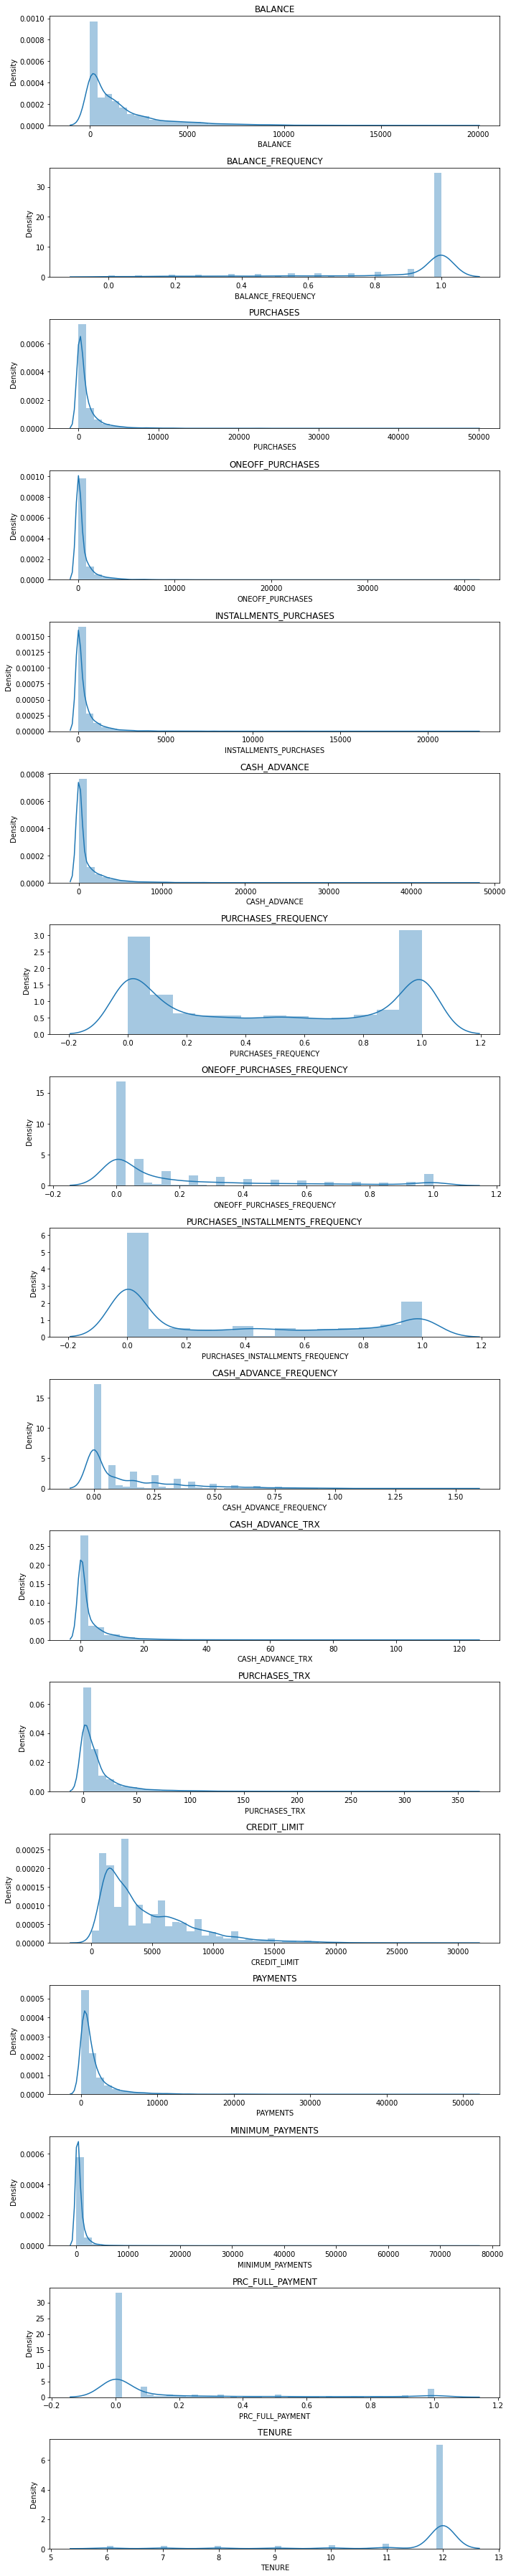

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

# Verificando a correlação

In [23]:
correlations = creditcard_df.corr()

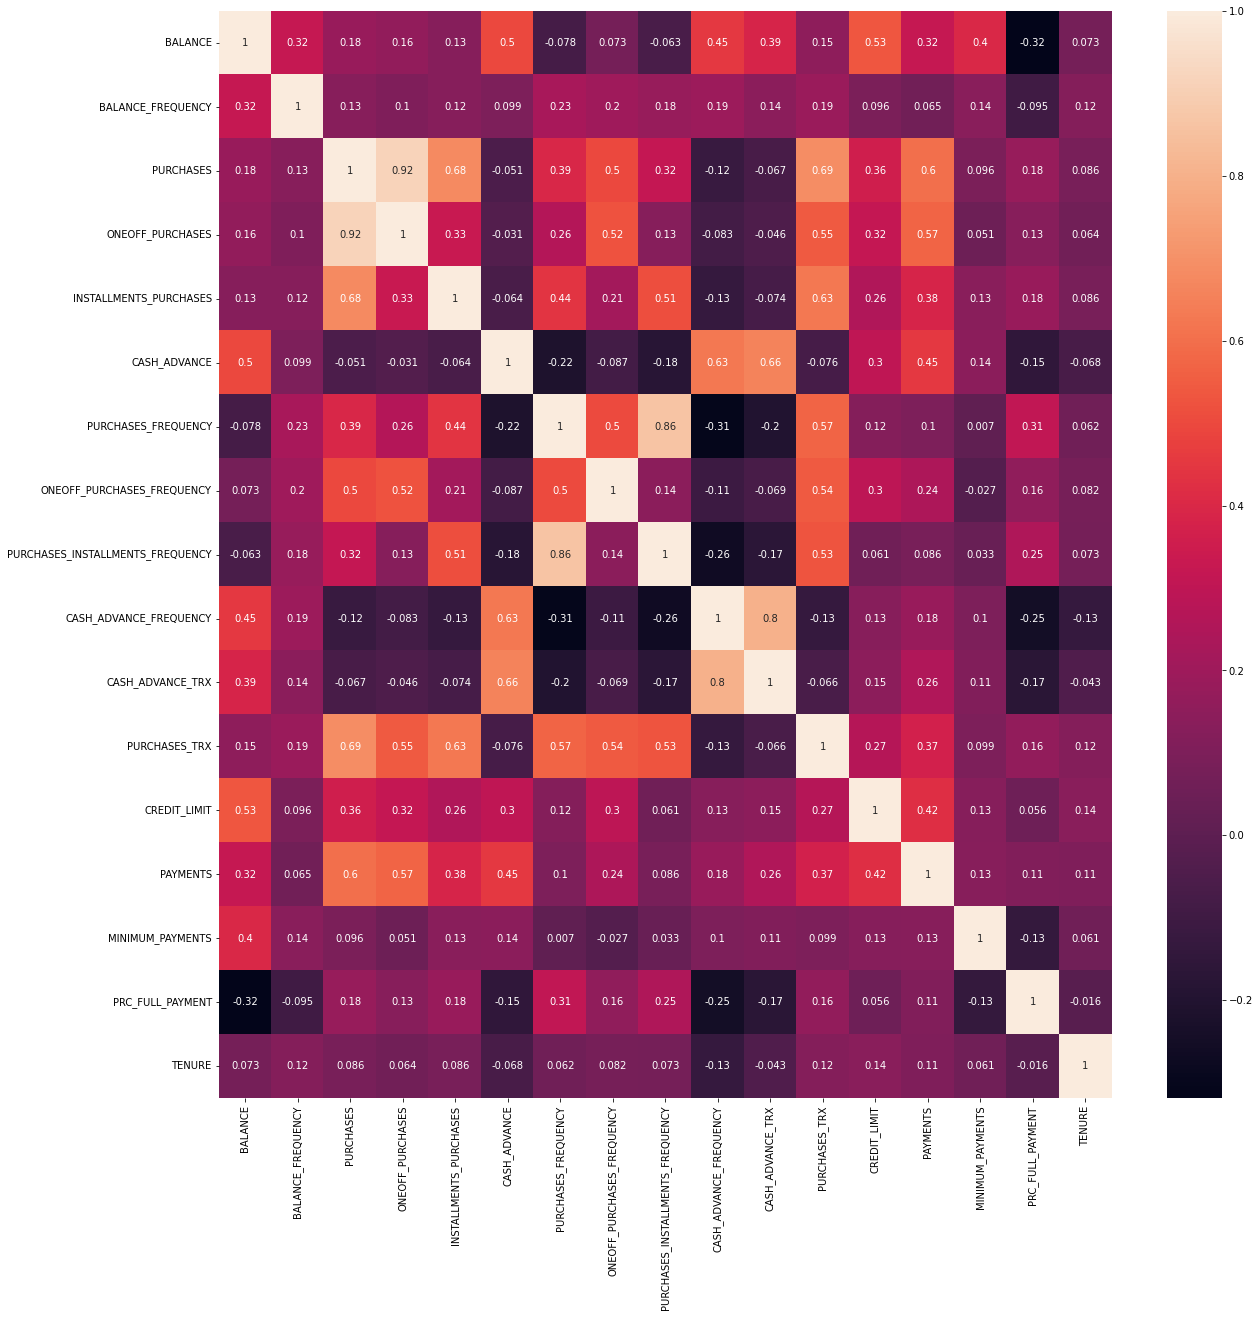

In [24]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

Podemos perceber que em alguns casos temos baixa correlação entre nossas  variáveis,mas temos casos onde  as variáveis  preditoras apresentam uma forte correlação de 0.8  que ocontece com C**ASH_ADVANCE_FREQUENCY e ASH_ADVANCE_TRX**

<font size=9 > Implementação do K-means  </font>

Este é um algoritmo de apredizagem não supervisionada ,nele os registros são agrupados baseados em atributos similares,por meio do cálculo da distância euclidiana.


## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

Vamos verificar os valores mínimo e máximo para a primeira variável(**BALANCE**)

In [25]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

Como podemos perceber, existe uma grande diferença entre o valor mínimo e máximo,ou seja, se rodarmos o modelo nessa forma , provavelmente ele iria considerar um atributo mais importante que outro,logo é importante colocar os dados na mesma escala.

<font size=9 > Padronizando   </font>

In [26]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

nossos dados agora estão em formato numpy 

In [27]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [28]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9603559774968957, 0.36067954425377496)

podemos perceber que de fato o intervalo entre o menor e o maior valor diminuiu 

In [29]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30002328,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09964824,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09103592,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32448412,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33590778,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32196886,
        -0.52555097, -4.12276757]])

Vamos definir o número de clusters inicial como 20,depois fazer o gráfico e utilizar a regra do cotovelo

In [30]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [31]:
print(wcss_1)


[152150.00000000003, 127784.29782355885, 111970.76810982528, 99058.95275726539, 91488.11789922699, 84819.50736979545, 79499.5280462791, 74591.63220360571, 69957.38498706139, 66425.81930089685, 63613.08507624696, 61352.746796082494, 59130.892745393205, 57479.91265401138, 55870.612970083705, 54258.86115710648, 52999.38283883597, 52092.511739694564, 50764.12105648281]


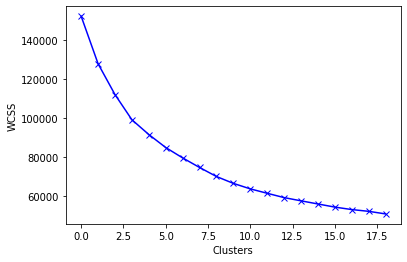

In [32]:

plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Pode-se perceber que entre o cluster 7 e 8 temos um início de um comportamento linear,então pela regra do cutuvelo vamos utilizar o k = 8 

## Agrupamento com k-means

Vamos utilizar o número de clusters inicial como 8, o argumento **random_state=0** permitirá que obteremos os mesmos valores de clusters toda vez que rodarmos o código abaixo. 

In [33]:

kmeans = KMeans(n_clusters=8,random_state=0)
kmeans.fit(creditcard_df_scaled)

labels = kmeans.labels_

In [34]:
labels, len(labels)

(array([0, 3, 1, ..., 2, 2, 2], dtype=int32), 8950)

In [35]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2727, 1100,  622,  869,   30,  420, 1181, 2001]))

In [36]:
kmeans.cluster_centers_

array([[ 1.48454998e-02,  4.04039656e-01, -3.61076703e-01,
        -2.47061088e-01, -3.99755397e-01, -9.16851030e-02,
        -8.61628982e-01, -4.09243391e-01, -7.53387056e-01,
         1.07497902e-01, -2.63598462e-02, -4.85397552e-01,
        -3.06088103e-01, -2.50517386e-01, -5.79493327e-03,
        -4.56932913e-01,  2.73268492e-01],
       [-1.56490743e-01,  3.92070278e-01,  4.55509036e-01,
         5.95104824e-01, -1.64220173e-02, -3.32293406e-01,
         9.42092454e-01,  1.87555352e+00,  9.22565902e-02,
        -4.06610416e-01, -3.22473533e-01,  5.26451765e-01,
         3.86183283e-01,  8.96762929e-02, -1.53962839e-01,
         4.05218850e-01,  2.61500260e-01],
       [-3.36049587e-01, -3.47077860e-01, -2.89266864e-01,
        -2.15966042e-01, -2.86835279e-01,  6.82835664e-02,
        -2.03077759e-01, -2.88661118e-01, -2.24548914e-01,
         3.08663197e-01,  9.96472666e-04, -3.88116768e-01,
        -5.67969945e-01, -3.92679966e-01, -2.17613855e-01,
         1.40113780e-02, -3.2

In [37]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.014845,0.404040,-0.361077,-0.247061,-0.399755,-0.091685,-0.861629,-0.409243,-0.753387,0.107498,-0.026360,-0.485398,-0.306088,-0.250517,-0.005795,-0.456933,0.273268
1,-0.156491,0.392070,0.455509,0.595105,-0.016422,-0.332293,0.942092,1.875554,0.092257,-0.406610,-0.322474,0.526452,0.386183,0.089676,-0.153963,0.405219,0.261500
2,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567970,-0.392680,-0.217614,0.014011,-3.203733
3,1.685522,0.392008,-0.219500,-0.157912,-0.228961,2.016298,-0.480418,-0.215992,-0.415869,1.918659,1.933763,-0.268325,1.024635,0.821529,0.561336,-0.391524,0.070038
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044074,8.098975,1.129094,1.110132,0.310863
5,0.897974,0.466622,2.280382,1.761969,2.154947,-0.193574,1.159813,1.581427,1.228027,-0.309587,-0.210212,2.793669,1.221324,1.294584,0.451391,0.302568,0.333992
6,-0.701022,-2.142837,-0.311071,-0.235785,-0.302230,-0.322027,-0.556095,-0.444950,-0.439069,-0.520975,-0.376187,-0.419595,-0.175899,-0.201752,-0.291931,0.280867,0.199336
7,-0.365304,0.333189,-0.036222,-0.244327,0.363038,-0.364848,0.997189,-0.387824,1.213089,-0.475819,-0.361682,0.190151,-0.261755,-0.216677,-0.022973,0.319714,0.256865


- Grupo 4 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.48). Aumentar o limite do cartão e o hábito de compras

- Grupo 6: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (105 dólares) e não sacam muito dinheiro do limite do cartão(**CASH_ADVANCE**)  303 dólares. Apenas 24% apróximadamente desses clientes pagam a fatura completa(**PRC_FULL_PAYMENT**).

- Grupo 3: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente(**BALANCE**) 5067 dólares e sacam muito dinheiro do cartão de crédito (5207), compram pouco(**PURCHASES_FREQUENCY**) cerca de 30%  e usam bastante o limite do cartão para saques(**CASH_ADVANCE_FREQUENCY**) 52% apróximadamente.Além disso pagam muito pouco a fatura completa 4%,apróximadamente,logo, é um grupo de risco para aumentar o limite do cartão.

- Grupo 2 (clientes novos): clientes mais novos (7.23) e que possui menor limite de crédito 2427 dólares.




In [38]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers	

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1595.374482,0.972984,231.758893,182.366568,49.573799,786.603169,0.144537,0.080372,0.065022,0.156656,3.068940,2.644664,3380.534165,1007.920566,826.236624,0.020070,11.883022
1,1238.752555,0.970149,1976.406909,1580.189491,396.217418,282.036318,0.868458,0.761972,0.401102,0.053777,1.048182,27.795455,5899.342975,1992.747933,480.413804,0.272234,11.867273
2,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2427.684887,596.373827,331.852791,0.157813,7.229904
3,5072.746521,0.970134,534.238711,330.334983,204.020725,5207.141207,0.297536,0.138023,0.199161,0.519087,16.445339,8.040276,8222.329742,4111.389774,2149.915094,0.039200,11.611047
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,3433.531923,0.987809,5875.275643,3516.945024,2359.759190,572.937465,0.955839,0.674228,0.852487,0.073193,1.814286,84.150000,8937.976190,5480.836457,1893.304230,0.242211,11.964286
6,105.356543,0.369652,338.597087,201.083235,137.765165,303.564554,0.267163,0.069720,0.189940,0.030892,0.681626,4.280271,3854.224762,1149.091856,158.397942,0.235863,11.784081
7,804.125571,0.956200,925.815397,186.903808,739.358006,213.768492,0.890571,0.086762,0.846550,0.039928,0.780610,19.436282,3541.839181,1105.885986,786.142362,0.247226,11.861069


In [39]:
labels, len(labels)

(array([0, 3, 1, ..., 2, 2, 2], dtype=int32), 8950)

Adicionando cada um dos grupos a cada um dos clientes 

In [40]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,165.231953,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Gerando hsitogramaspara cada atributo e cada clusters 

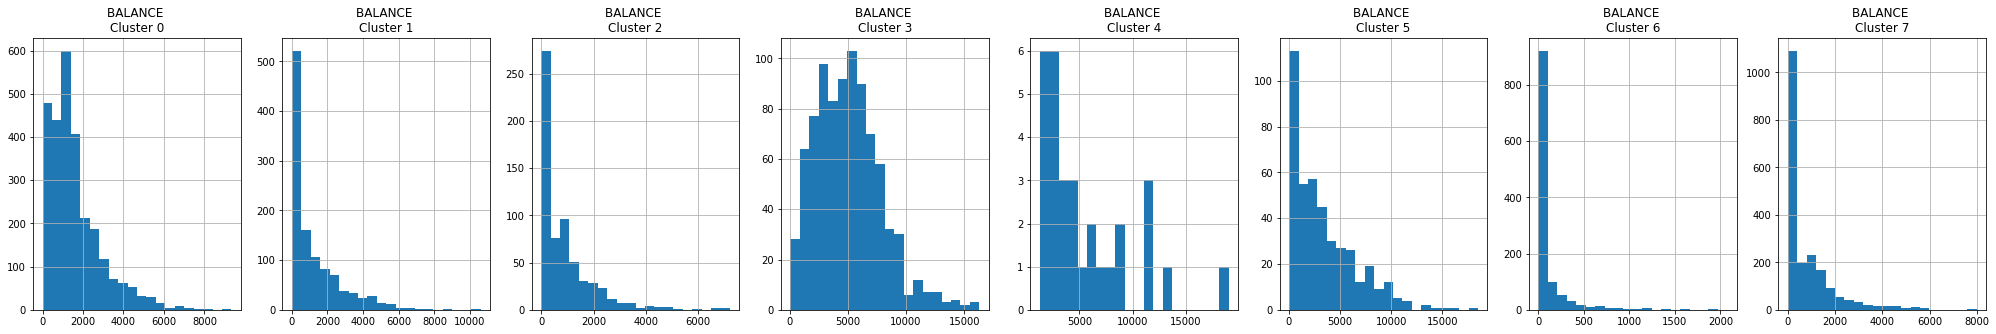

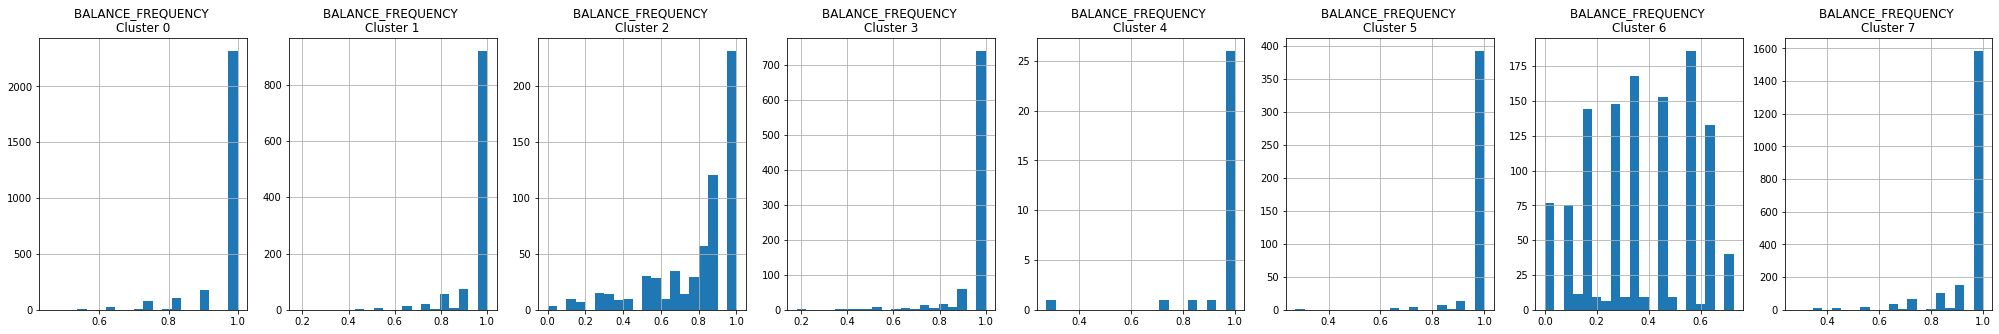

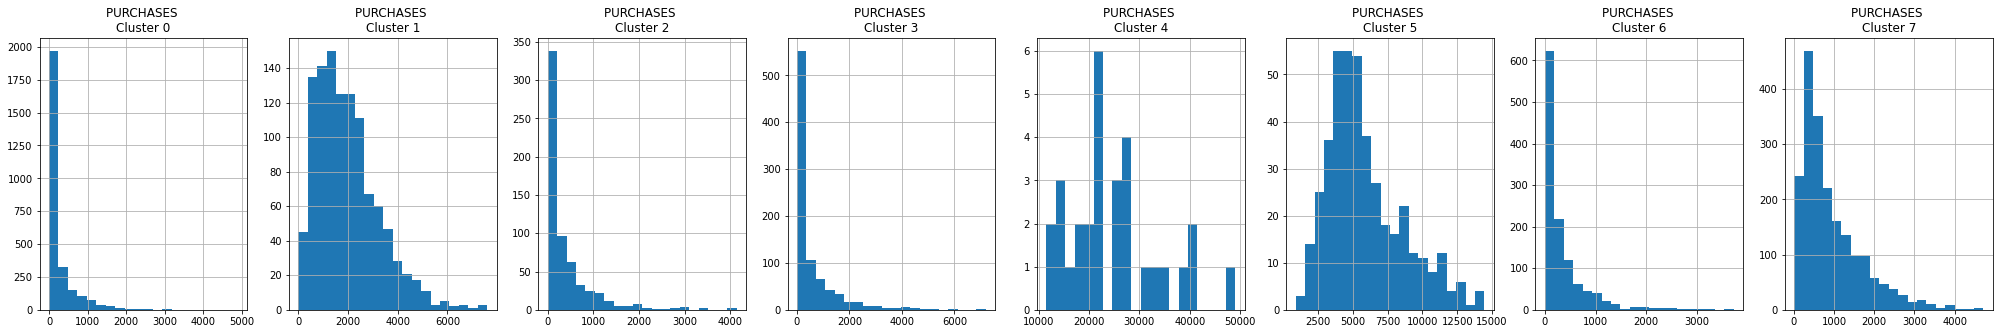

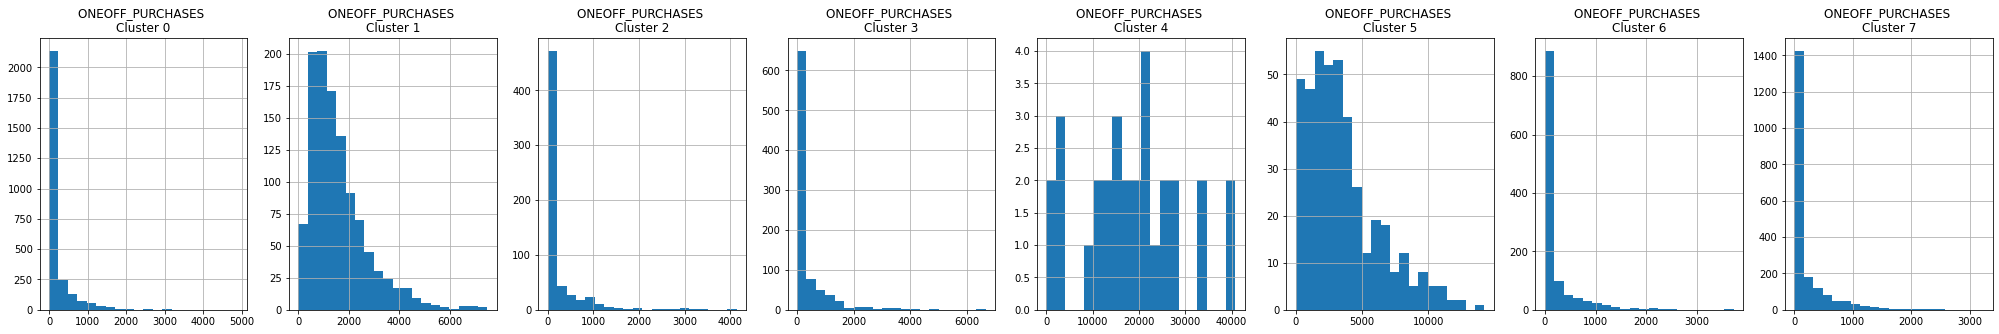

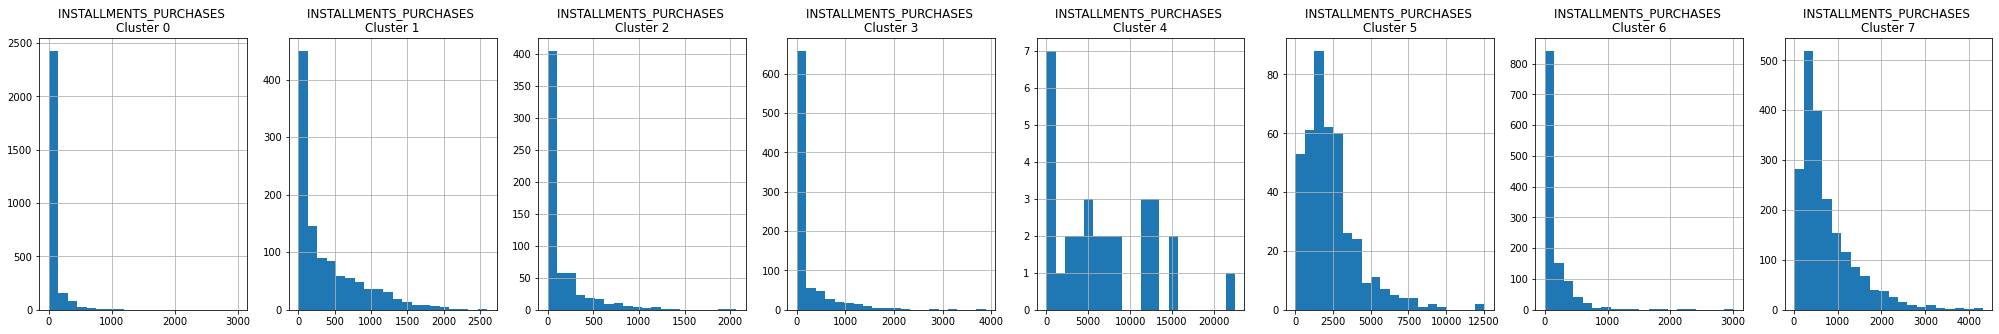

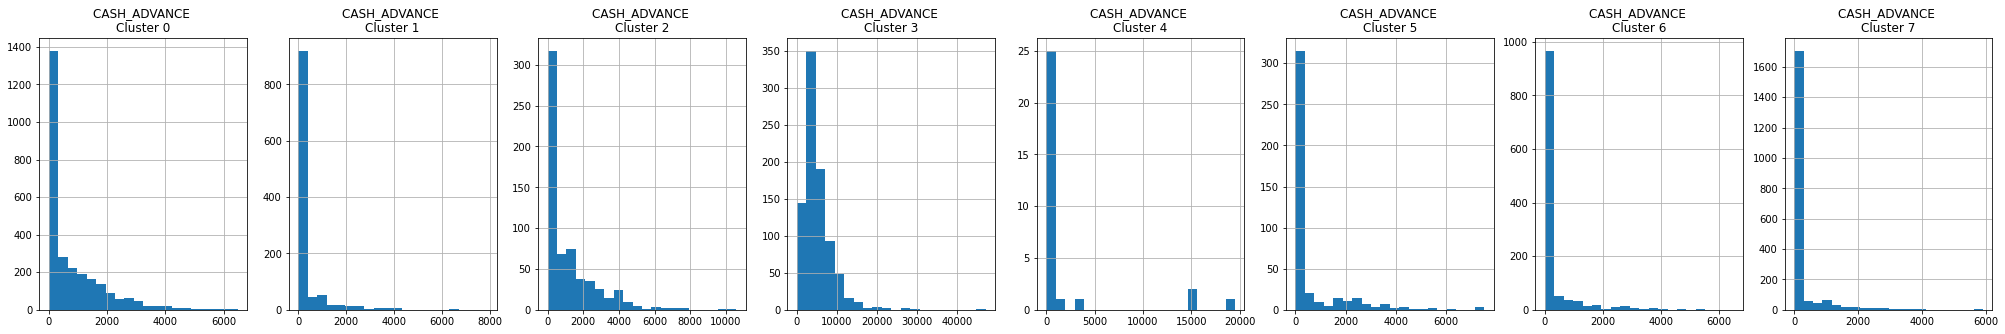

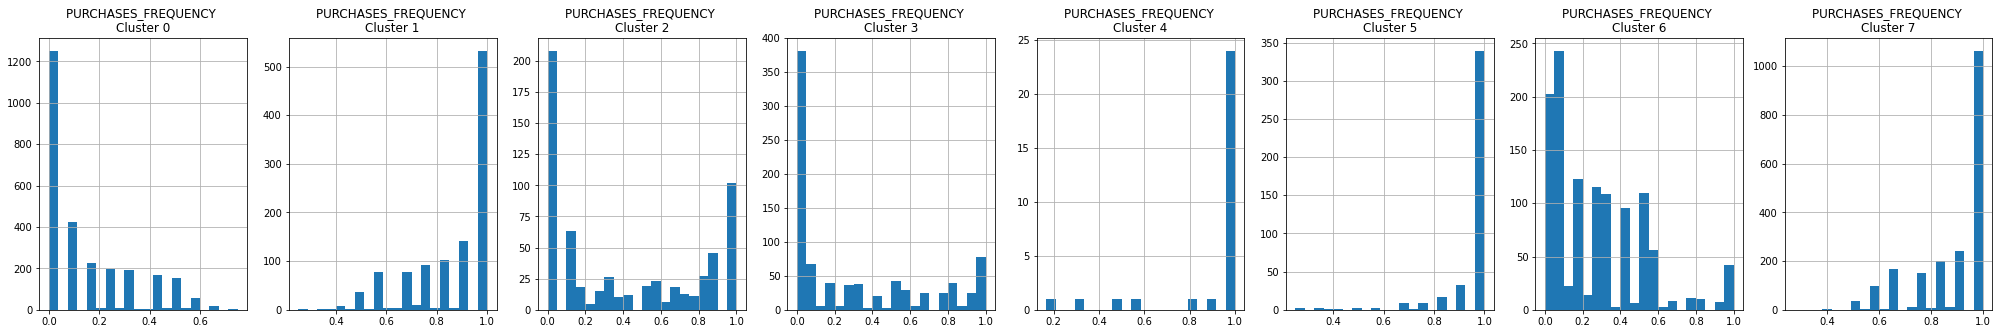

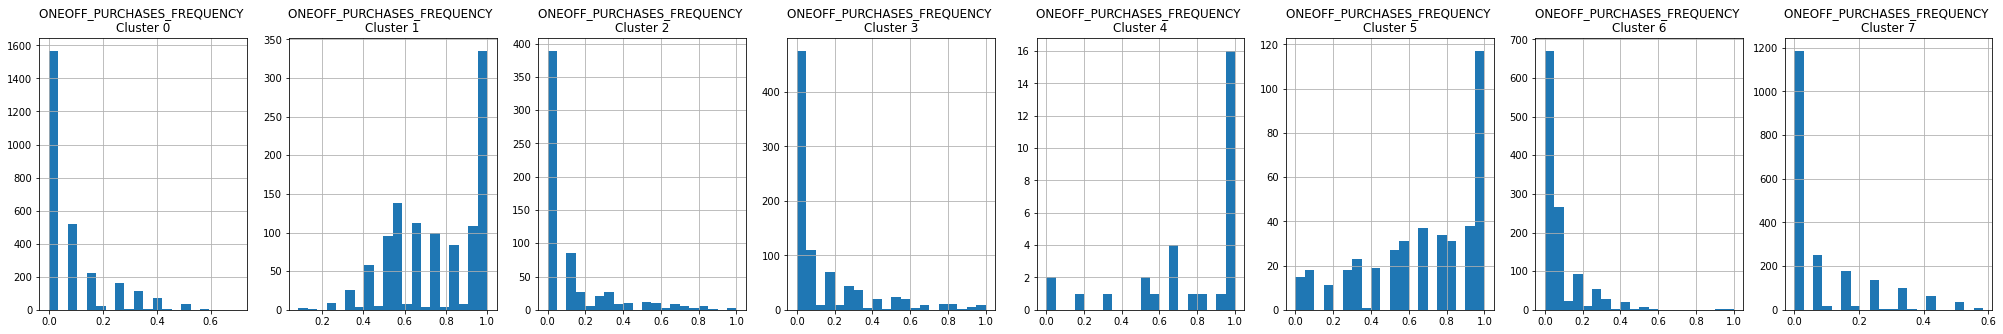

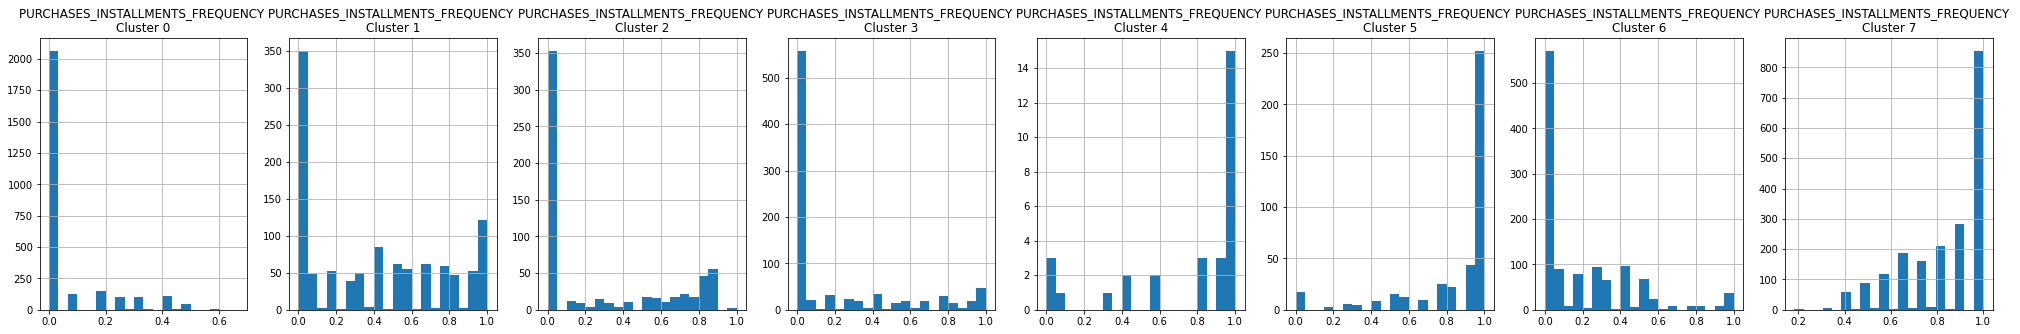

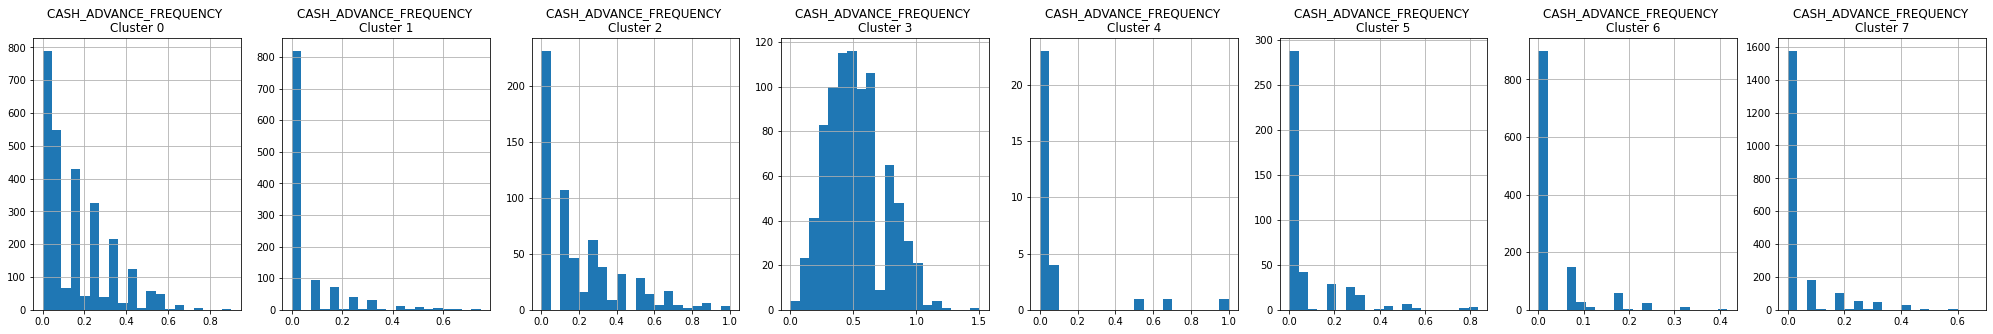

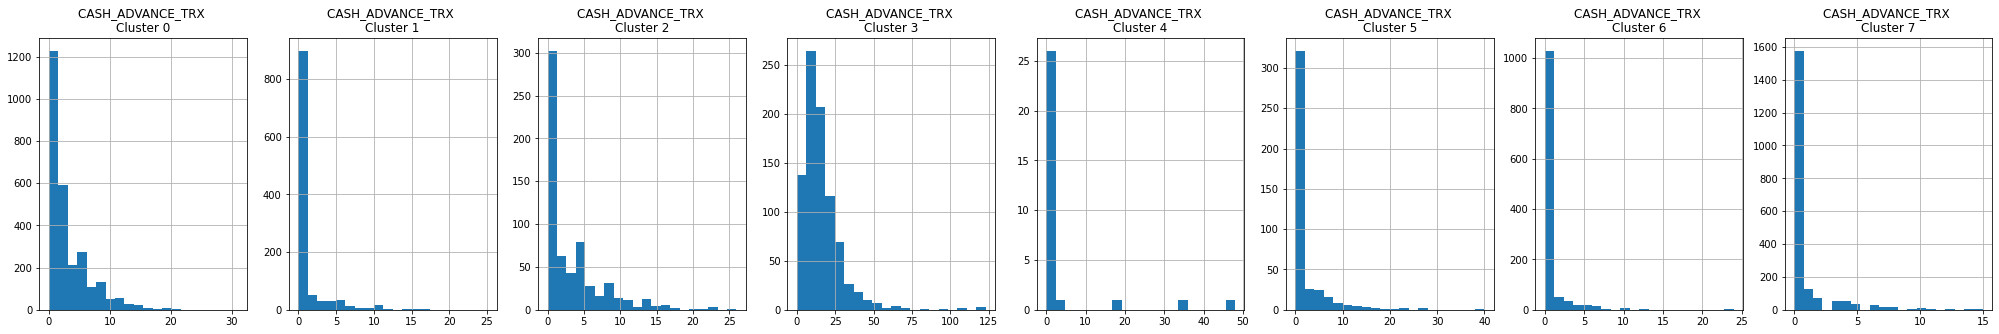

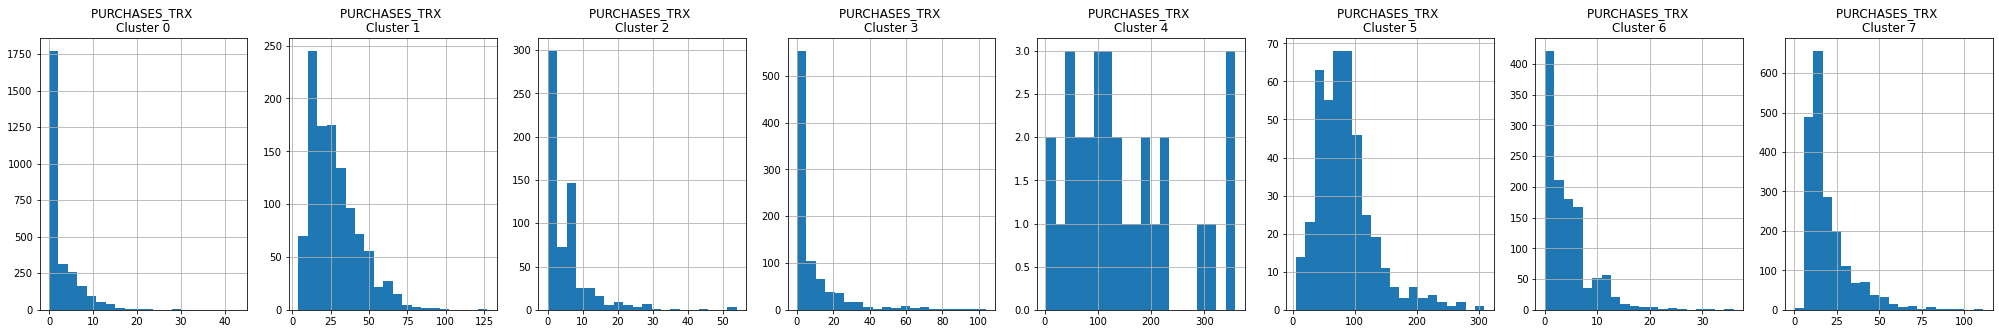

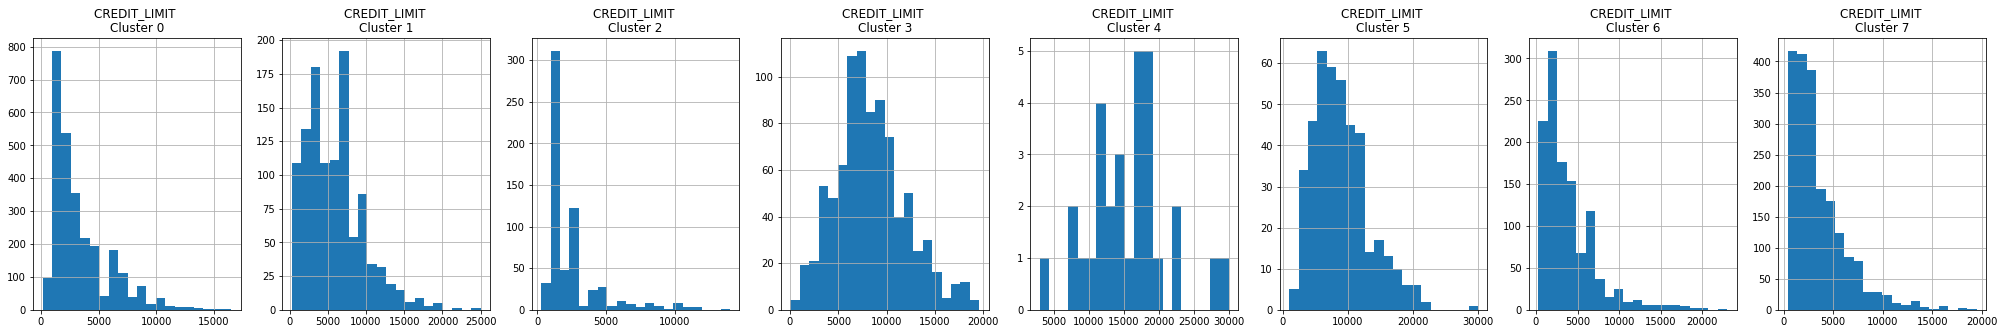

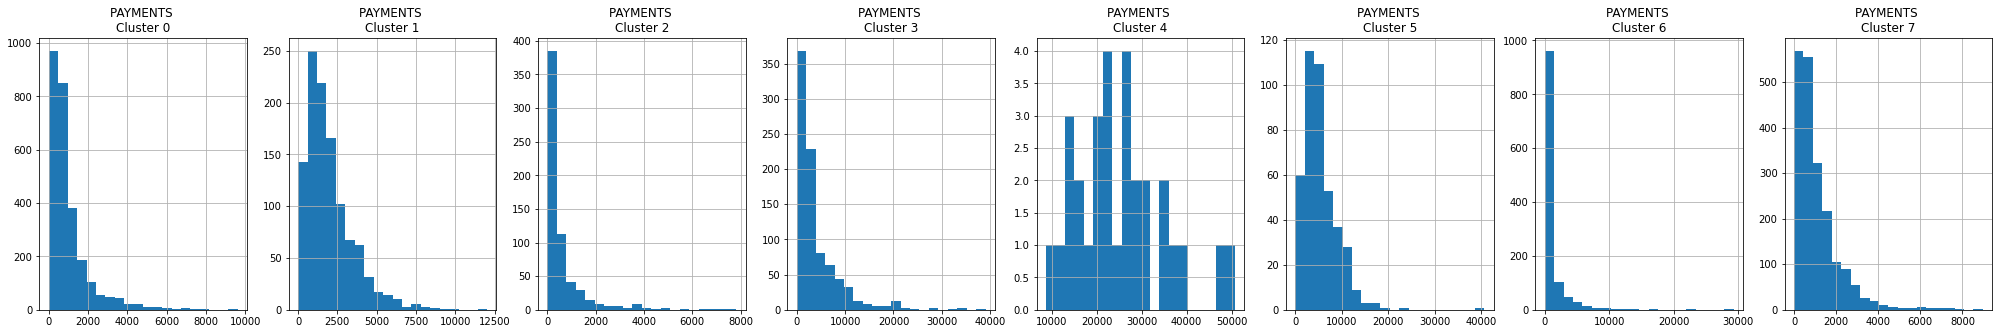

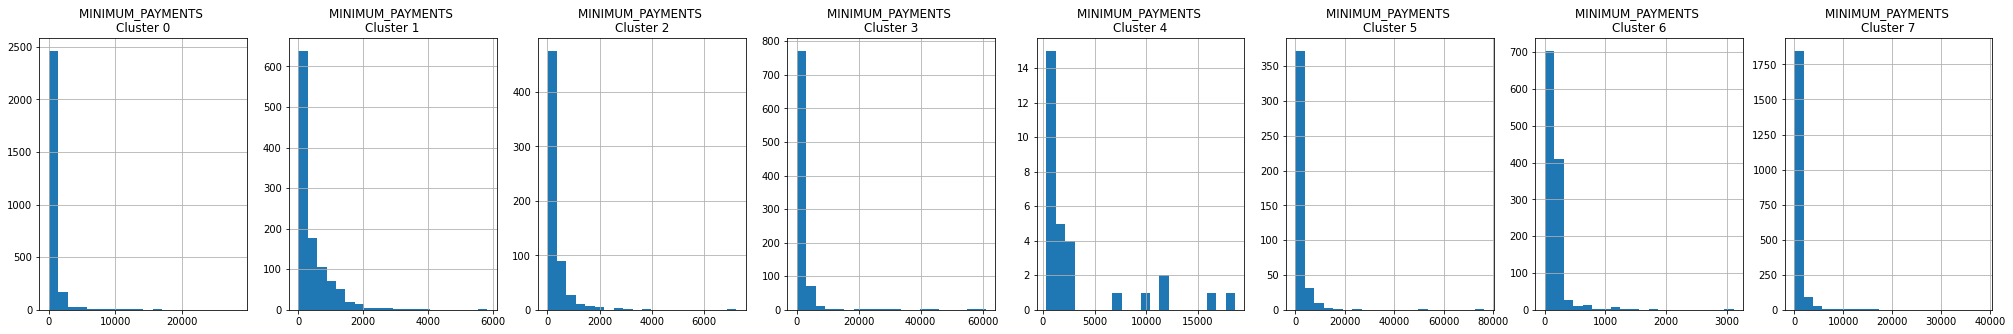

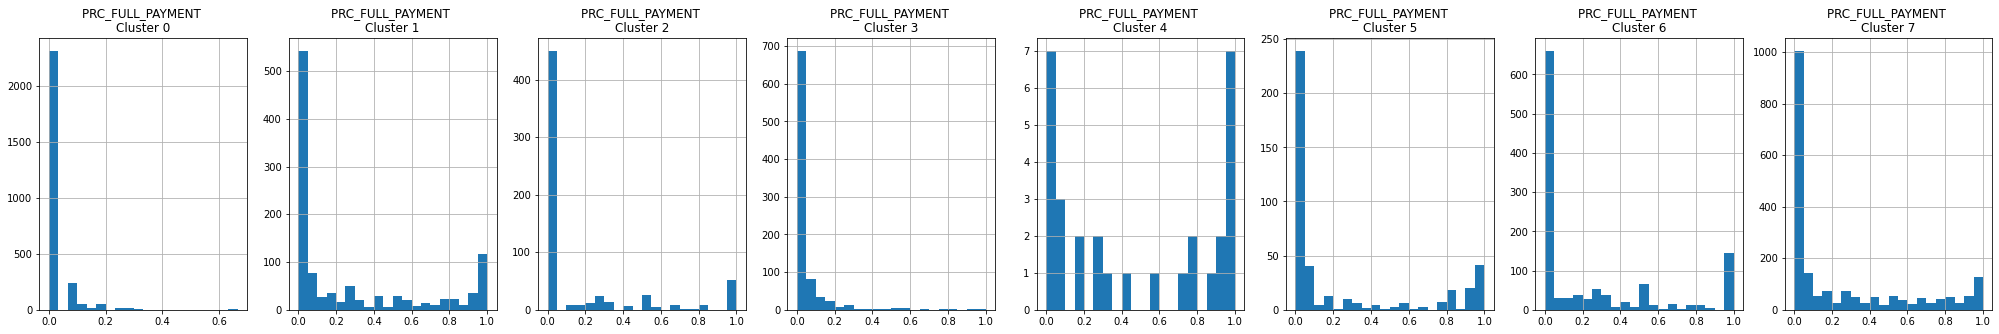

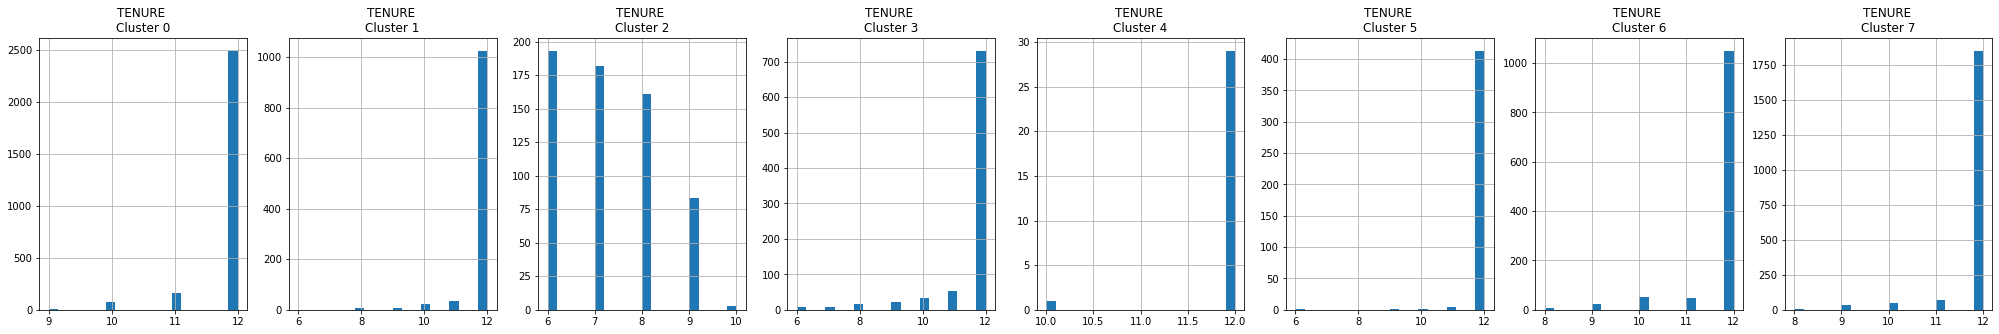

In [41]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

Ordenando os dados pela ordem de clusters 

In [42]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
4225,226.785380,1.000000,210.64,210.64,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3500.0,295.155445,176.886468,0.000000,12,0
4226,41.643083,1.000000,212.00,212.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,596.834019,47.139699,0.083333,12,0
4227,291.663664,1.000000,129.00,129.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5500.0,284.596786,200.845446,0.000000,12,0
4228,1437.977941,1.000000,229.94,229.94,0.0,901.185629,0.250000,0.250000,0.000000,0.583333,10,4,1800.0,783.528158,394.172631,0.000000,12,0


Vendo os últimos 5 registros 

In [43]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6977,47.336863,0.909091,464.95,134.90,330.05,0.000000,0.75,0.166667,0.416667,0.000000,0,14,1000.0,424.138187,153.671805,0.454545,12,7
6978,4481.413948,1.000000,1385.56,250.00,1135.56,1308.516411,1.00,0.166667,1.000000,0.083333,4,39,4500.0,1517.623087,4341.647445,0.000000,12,7
1803,1611.475175,1.000000,807.72,0.00,807.72,0.000000,1.00,0.000000,1.000000,0.000000,0,36,1500.0,1019.454819,2134.562981,0.000000,12,7
6967,75.986300,1.000000,986.00,0.00,986.00,0.000000,1.00,0.000000,0.800000,0.000000,0,10,1000.0,807.394469,146.785318,0.555556,10,7
985,2797.233197,1.000000,2197.21,1101.76,1095.45,1824.823395,1.00,0.250000,1.000000,0.083333,2,31,4000.0,0.000000,165.231953,0.000000,12,7


Salvando os resultados em uma nova base de dados csv

In [44]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

É utilizado para a redução de dimencionalidade,onde tenta manter as informações originais com as mesmas características,onde será encontrado um novo conjunto de características chamadas de componentes, esses componentes são criados por meio de características não correlacionadas.

In [45]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68399718, -1.07111601],
       [-1.13297366,  2.5098449 ],
       [ 0.96932494, -0.38354016],
       ...,
       [-0.92968878, -1.80729876],
       [-2.3381561 , -0.65244255],
       [-0.55843177, -0.40064846]])

In [46]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.683997,-1.071116
1,-1.132974,2.509845
2,0.969325,-0.383540
3,-0.892327,-0.005750
4,-1.600147,-0.682519


In [47]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683997,-1.071116,0
1,-1.132974,2.509845,3
2,0.969325,-0.383540,1
3,-0.892327,-0.005750,0
4,-1.600147,-0.682519,0


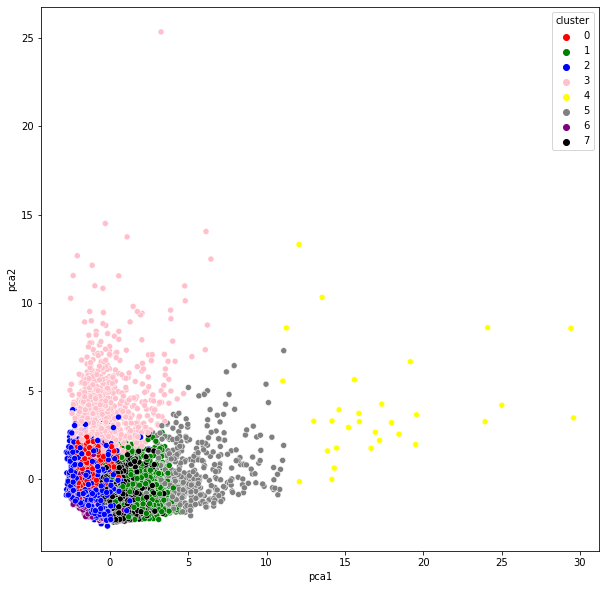

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

<font size= 9 > Utilizando autoencoders </font>

Autoencoders  são redes neurais artificiais para  codificar dados,onde será utilizada a mesma entrada e a mesma saída para comparar os resultados,vamos utilizar essa técnica para redução de dimensionalidade 

## Aplicação de autoencoders

In [49]:
# 18 -> 10 iremos fazer a redução de dimensionalidade  de 18 para 10 ,com base na correlação dos atributos 
# aplicaremos o método Elbow
# executaremos novamente o K-means
# e por último faremos a análise de componentes principais(PCA)

In [50]:
creditcard_df_scaled.shape

(8950, 17)

como nossos dados não são do tipo imagem , primeiro aumentaremos o número de  camadas de 17 para 500 e depois para 2000,depois deminuiremos para 10 que são as camadas centrais e faremos o processo inverso, de 10 vamos pra 2000, de 2000 vamos para 500  e de  500 vamos para 17. Essa é uma tecnica muito utilizada quando temos um conjunto de dados pequeno 


In [51]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense # camada de entrada, onde recebe os 17 atributos 
from tensorflow.keras.models import Model #camada de contrução da rede neural 

implementando usando a função de ativação **relu**

In [108]:

import tensorflow as tf



# Fazendo o  procedimento citado acima 
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
np.random.seed(42)
tf.random.set_seed(42)

input_df = Input(shape=(17,)) #atributos base

# 17 -> 500
x = Dense(500, activation='relu')(input_df)


# 500 -> 2000 
x = Dense(2000, activation='relu')(x)

# 2000 -> 10 
encoded = Dense(10, activation='relu')(x)

#10 -> 2000 
x = Dense(2000, activation='relu')(encoded)

#2000 -> 500
x = Dense(500, activation='relu')(x)

#500 -> 17
decoded = Dense(17)(x)




Criando o autoencoder passando a camanda incial **input_df**, e a camada final **decoded**

In [54]:
# autoencoder
autoencoder = Model(input_df, decoded)


Criando o encoder que guardará as informações da camada central,para isso passamos a camada incial **input_df** e a camada cenetral **encoded**

In [55]:
# encoder
encoder = Model(input_df, encoded)

Fazendo a copilação do modelo utilizando o optimizador **Adam** para ajustes dos pesos e afunção de erro que será o erro ao quadrado **mean_Squared_error**

In [56]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

Como citamos acima,sera comparado os dados de entrada com os próprios dados de entrada,o núremo de epócas será igual a 50 

In [57]:

autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

vendo o tamanho 

In [58]:
creditcard_df_scaled.shape

(8950, 17)

In [59]:

compact = encoder.predict(creditcard_df_scaled)

In [60]:
compact.shape

(8950, 10)

tamanho dos dados originais 

In [61]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96035598, -0.52897879, -0.30002328,
       -0.52555097,  0.36067954])

tamanho com os dados compactados 

In [62]:
compact[0]

array([1.0418098 , 0.60868424, 0.        , 0.        , 0.59545267,
       0.24053022, 0.19167763, 0.18680742, 0.48949742, 0.02707336],
      dtype=float32)

aplicando o método Elbow nos novos dados(conjunto comapctado anteriormente)

In [63]:

wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

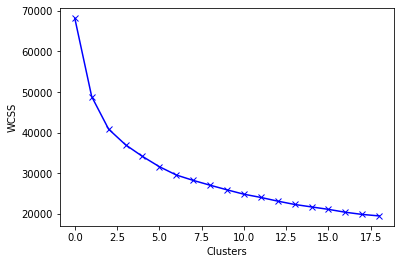

In [64]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

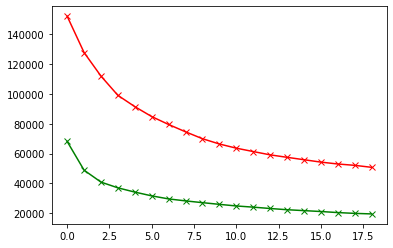

In [65]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

podemos ver que entre 3 e 4 a linha verde começa a ter um comportamento linear, então pela regra do cotovelo vamos utilizar o k = 4 

In [66]:

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(compact)
labels = kmeans.labels_

Salvando os labels do clusters 

In [67]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 0, 2, ..., 0, 0, 0], dtype=int32), (8950,))

Fazendo a concatenação com a base original 

In [68]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,165.231953,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [69]:
#for i in creditcard_df.columns:
 # plt.figure(figsize=(35,5))
#  for j in range(4):
   # plt.subplot(1, 4, j + 1)
   # cluster = df_cluster_at[df_cluster_at['cluster'] == j]
   # cluster[i].hist(bins = 20)
    #plt.title('{} \nCluster {}'.format(i, j))
 # plt.show()

# Vamos separar o cluster para poder extrair informações importantes e poder interpretar melho os resultados 

In [79]:
grupo0= df_cluster_at[df_cluster_at['cluster'] == 0]

grupo0.describe()


# grupo formado por novos clientes , que possuem pouco saldo em conta (**BALANCE**) apenas 1252 dólares e que compram menos em relação ao grupo 2 que é o mais cauteloso 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.0
mean,1251.898389,0.748101,909.736142,605.386528,304.611574,1098.409374,0.334213,0.178189,0.201490,0.170746,3.625000,10.525463,4498.022996,1665.449831,590.652742,0.234166,10.920525,0.0
std,1728.655555,0.312362,1622.579957,1244.990521,759.812995,1456.002167,0.371665,0.283083,0.320401,0.182695,4.570706,22.006984,3667.680434,1815.336898,1264.534245,0.369619,1.929841,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.055880,0.000000,6.000000,0.0
25%,70.773025,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,361.842660,139.332011,0.000000,11.000000,0.0
50%,486.416101,0.909091,174.055000,0.000000,0.000000,438.734033,0.166667,0.000000,0.000000,0.111111,2.000000,2.000000,3000.000000,1007.355346,202.990681,0.000000,12.000000,0.0
75%,1729.617488,1.000000,1024.702500,570.920000,233.925000,1817.637598,0.666667,0.250000,0.333333,0.333333,6.000000,10.000000,6000.000000,2372.899232,600.452367,0.333333,12.000000,0.0
max,12596.421940,1.000000,9934.930000,8500.670000,7131.360000,9671.336737,1.000000,1.000000,1.000000,0.833333,28.000000,232.000000,25000.000000,14373.392900,20316.096310,1.000000,12.000000,0.0


In [80]:
grupo1= df_cluster_at[df_cluster_at['cluster'] == 1]

grupo1.describe()

# grupo com bom saldo em conta, que mais utiliza o saldo do cartão **CASH_ADVANCE_FREQUENCY** , porém que paga apenas 9% da parcela total,sendo considerado um grupo de risco  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.0
mean,4338.237418,0.932543,1558.173352,1069.152174,489.137506,4202.638357,0.333564,0.206570,0.226657,0.483092,13.878719,19.483982,7809.272935,4491.518801,2338.568393,0.093474,11.210526,1.0
std,3198.449211,0.157585,2972.573931,2325.060929,1216.529521,3111.700624,0.392746,0.302459,0.359774,0.274346,10.864212,41.700183,4296.282301,3939.419199,4212.982534,0.223453,1.705480,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,5.045387,0.000000,6.000000,1.0
25%,1734.271314,1.000000,0.000000,0.000000,0.000000,1967.198645,0.000000,0.000000,0.000000,0.250000,6.000000,0.000000,4525.000000,1476.499186,534.640762,0.000000,12.000000,1.0
50%,3789.665816,1.000000,149.465000,0.000000,0.000000,3698.688472,0.095454,0.000000,0.000000,0.500000,12.000000,2.000000,7500.000000,3072.357345,1248.004334,0.000000,12.000000,1.0
75%,6103.925660,1.000000,1333.005000,802.127500,268.745000,5800.788121,0.750000,0.333333,0.416667,0.666667,19.000000,15.000000,10000.000000,6849.545843,2278.435144,0.083333,12.000000,1.0
max,18495.558550,1.000000,15704.040000,14215.000000,9251.650000,16323.642430,1.000000,1.000000,1.000000,1.500000,71.000000,309.000000,30000.000000,24199.111080,38512.124770,1.000000,12.000000,1.0


In [81]:
grupo2= df_cluster_at[df_cluster_at['cluster'] == 2]

grupo2.describe()


# grupo com menor saldo em conta, que são mais caltelos 
#grupo com menor  cash_advanced e que sacam dinheiro do cartão de crédito em apenas 6%  dos casos apróximadamente 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.0
mean,1208.528119,0.930272,811.425573,408.515021,403.259628,290.107081,0.589494,0.210530,0.463375,0.058354,1.063183,15.143042,3834.231606,1028.740983,626.622452,0.122439,11.850843,2.0
std,1487.120321,0.173138,1003.276159,701.556054,568.360389,643.526284,0.383548,0.301416,0.403444,0.096161,2.015850,18.141450,2980.599507,1055.568154,1099.009719,0.247552,0.626942,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000,2.0
25%,114.523682,1.000000,133.340000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,3.000000,1500.000000,350.078829,168.037964,0.000000,12.000000,2.0
50%,797.925938,1.000000,443.250000,52.490000,199.820000,0.000000,0.666667,0.083333,0.416667,0.000000,0.000000,10.000000,3000.000000,684.225274,269.844517,0.000000,12.000000,2.0
75%,1646.384530,1.000000,1100.000000,540.000000,549.170000,216.032020,1.000000,0.333333,0.916667,0.083333,1.000000,20.000000,5500.000000,1348.321843,664.585302,0.090909,12.000000,2.0
max,12474.729540,1.000000,6697.570000,5506.810000,5580.850000,6771.644515,1.000000,1.000000,1.000000,0.583333,18.000000,157.000000,21500.000000,11263.921850,15914.721540,1.000000,12.000000,2.0


In [82]:
grupo3= df_cluster_at[df_cluster_at['cluster'] == 3]

grupo3.describe()
#grupo com maior saldo na conta , e que não sacam muito dinheiro do cartão de credito ,possui em média um limit de credito de 12020 dólares,
#apenas 30% fazem o pagamento total da parcela 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,5092.911775,0.882465,10109.653448,6827.103678,3282.802644,7758.684170,0.566958,0.383418,0.465756,0.342613,20.839080,64.540230,12020.689655,19736.655166,6426.522442,0.302145,11.689655,3.0
std,4067.267110,0.239437,12380.652942,10511.294200,4864.829277,9337.725242,0.445511,0.403840,0.447441,0.367926,31.601396,90.120953,5597.469069,10436.634147,14270.999309,0.345206,1.134146,0.0
min,4.382924,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,92.865469,165.231953,0.000000,6.000000,3.0
25%,1908.189828,0.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,12944.372580,655.832099,0.000000,12.000000,3.0
50%,3808.073463,1.000000,3837.590000,963.240000,516.270000,4262.120108,0.750000,0.250000,0.363636,0.166667,6.000000,21.000000,11500.000000,19740.748020,1343.985397,0.166667,12.000000,3.0
75%,7653.799788,1.000000,19183.295000,11956.585000,5011.790000,14124.482470,1.000000,0.750000,1.000000,0.696970,27.500000,96.500000,16000.000000,26191.211030,2947.848854,0.500000,12.000000,3.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.0


# Interpretação 


- Grupo 3 (VIP/Prime): limite do cartão alto (12020) e o mais alto percentual de pagamento da fatura completa (0.30). Aumentar o limite do cartão e o hábito de compras

- Grupo 2:  grupo com menor saldo em conta, que são mais cautelososo 
possui  menor  **cash_advanced** 290 dólares  e que sacam dinheiro do cartão de crédito em apenas 6%  dos casos apróximadamente. 

- Grupo 1: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), grupo com bom saldo em conta, que mais utiliza o saldo do cartão  48% das vezes(**CASH_ADVANCE_FREQUENCY**) , porém que paga apenas 9% da parcela total,sendo considerado um grupo de risco, 

- Grupo o (clientes novos): grupo formado por novos clientes , que possuem pouco saldo em conta (**BALANCE**) apenas 1252 dólares e que compram menos em relação ao grupo 2 que é o mais cauteloso


Fazendo a análise de componentes principais ,vamos dividir em dois grupos que seram as cordenadas dos pontos 

In [100]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.413994,-0.240108
1,1.540154,-1.435741
2,-1.323007,0.519233
3,0.078908,-0.322355
4,-1.275620,-0.159414


Fazendo a concatenação dos coponentes encontrados com os clusters 

In [101]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.413994,-0.240108,2
1,1.540154,-1.435741,0
2,-1.323007,0.519233,2
3,0.078908,-0.322355,0
4,-1.275620,-0.159414,2


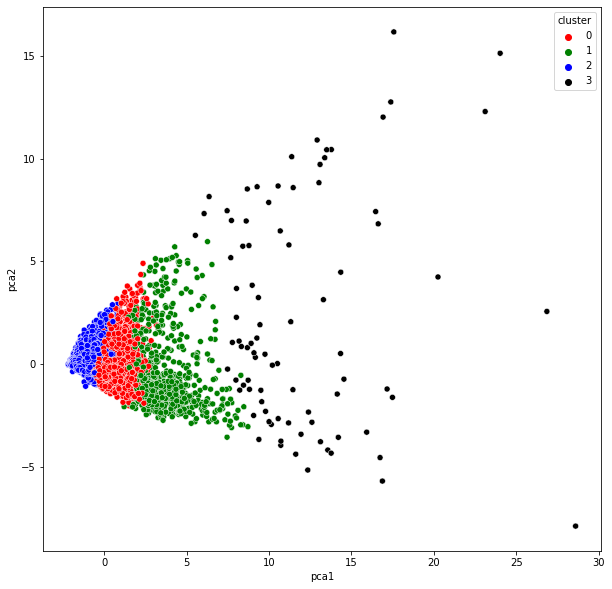

In [102]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'black'])

In [103]:
pca_df['cluster'] = pca_df['cluster'].astype('category')

In [104]:
import plotly.express as px
pca_df['size'] = np.random.randint(10, 100, size=len(pca_df))
fig = px.scatter(pca_df, x='pca1', y='pca2', color='cluster',title = 'Gráfico dos Clusters',color_discrete_sequence=['red' ,'orange','blue','purple'],size='size')

fig.update_layout(
    paper_bgcolor='#23262F',plot_bgcolor = "#23262F",title_x=0.5,title_font_color='white',font_color='white'
)
fig.show()



Aqui podemos ver uma visualização gráfica dos cluster  citados anteriormente , como foi citado ,aqui temos apenas uma representação gráfica.  Vamos ordenar a base de dados dos cluster para poder repassar ao setor de marketing para eles análisarem e poderem tomar decisões a quais grupos  investir  em campanhas publicitárias.


Ordenandos os clusters 

In [105]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4474,5256.695330,1.000000,188.60,188.60,0.0,1934.418697,0.083333,0.083333,0.0,0.333333,4,1,9000.0,1421.954639,1452.249653,0.000000,12,0
4552,3219.604215,1.000000,4126.75,4126.75,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0,31,10500.0,6061.100911,1113.256834,0.000000,12,0
4553,337.178513,1.000000,3809.71,3809.71,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0,16,16500.0,2837.599645,238.075524,0.916667,12,0
4554,217.101560,0.818182,2953.03,2953.03,0.0,0.000000,0.166667,0.166667,0.0,0.000000,0,3,5000.0,3123.296573,118.209566,0.125000,12,0
4556,313.133110,1.000000,49.09,49.09,0.0,1306.110387,0.166667,0.166667,0.0,0.416667,13,2,6500.0,1405.747523,189.159601,0.166667,12,0


In [106]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1913,1856.325339,0.818182,670.50,516.90,153.60,5603.126858,0.545455,0.272727,0.363636,0.727273,107,9,7000.0,9221.922948,537.180986,0.142857,11,3
6956,670.120718,1.000000,0.00,0.00,0.00,12281.834390,0.000000,0.000000,0.000000,0.583333,31,0,1200.0,12485.432890,591.573521,0.500000,12,3
7132,9024.812044,1.000000,0.00,0.00,0.00,2750.442399,0.000000,0.000000,0.000000,0.083333,2,0,9000.0,302.484224,61031.618600,0.000000,12,3
658,3808.073463,0.909091,6030.34,2874.89,3155.45,7279.880364,1.000000,0.500000,1.000000,0.500000,62,104,7000.0,17084.851920,2068.252050,0.090909,12,3
2823,11642.601560,1.000000,15108.47,2370.00,12738.47,0.000000,1.000000,0.500000,1.000000,0.000000,0,298,12000.0,16005.452040,11652.565110,0.000000,12,3


In [107]:
df_cluster_ordered.to_excel('cluster_ordereded.xls');

<ipython-input-107-637c0ce5a505>:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



# Conclusão



Como podemos ver, a análise de Cluster  é uma boa opção para tomarmos decisões com base em grupos, caso queiram reutilizar o código lembre-se que ao utilizar o método encoder para a redução de dimensionalidade outros valores podem ser gerados , sendo necessário  observar as caractéristicas dos cluster novamente devido a este fato .